# Subtype mapping to Pineros et al

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.8 umap==0.4.5 numpy==1.21.2 scipy==1.5.4 pandas==1.3.5 scikit-learn==0.22 statsmodels==0.13.2 python-igraph==0.8.0 louvain==0.7.0 leidenalg==0.7.0


In [3]:
sc.set_figure_params(frameon=False, dpi_save=300, color_map='Reds')

## Pineros et al

In [ ]:
pineros_1 = sc.read_10x_h5('./mouse_islets_notebooks/data/GSE162512_RAW/GSM4953224_LFD_1wk-2_filtered_feature_bc_matrix.h5')
pineros_2 = sc.read_10x_h5('./mouse_islets_notebooks/data/GSE162512_RAW/GSM4953223_LFD_1wk-1_filtered_feature_bc_matrix.h5')
pineros_3 = sc.read_10x_h5('./mouse_islets_notebooks/data/GSE162512_RAW/GSM4953225_LFD_3_filtered_feature_bc_matrix.h5')

In [8]:
pineros_1.var_names_make_unique()
pineros_2.var_names_make_unique()
pineros_3.var_names_make_unique()

In [9]:
pineros = pineros_1.concatenate(pineros_2, pineros_3, join='outer')

In [10]:
pineros

AnnData object with n_obs × n_vars = 33809 × 31053
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [11]:
sc.pp.filter_genes(pineros, min_cells=10)

filtered out 12793 genes that are detected in less than 10 cells


In [12]:
sc.pp.filter_cells(pineros, min_counts=1000)

filtered out 3723 cells that have less than 1000 counts


In [13]:
sc.pp.filter_cells(pineros, min_genes=200)

filtered out 4903 cells that have less than 200 genes expressed


In [14]:
sc.pp.normalize_total(pineros, exclude_highly_expressed=True)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['Gsn', 'Gcg', 'Chgb', 'Cst3', 'Tmsb4x', 'Cpb1', 'S100a9', 'Cela3b', 'Cela2a', 'Jchain', 'Cpa1', '2210010C04Rik', 'Try4', 'Try5', 'Prss2', 'Igkc', 'Reg1', 'Ghrl', 'Iapp', 'Apoe', 'Ftl1', 'Hbb-bt', 'Hbb-bs', 'Nupr1', 'Ins2', 'Ctrl', 'Ctrb1', 'Rnase1', 'Hba-a1', 'Hba-a2', 'Ccl5', 'Ccl4', 'Ppy', 'Pyy', 'Chga', 'Igha', 'Ighm', 'Cela1', 'Iglc1', 'Sst', 'Clps', 'Gm42418', 'Ttr', 'Cd74', 'Malat1', 'Fth1', 'Ins1', 'Pnlip', 'Pnliprp1', 'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Nd4', 'mt-Cytb']
    finished (0:00:01)


In [15]:
sc.pp.log1p(pineros)

### Manifold all cells

In [16]:
sc.pp.highly_variable_genes(pineros, n_top_genes=2000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [17]:
sc.pp.pca(pineros)
sc.pp.neighbors(pineros)
sc.tl.umap(pineros)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)


In [18]:
sc.set_figure_params(frameon=False)

/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'feature_types' as categorical
/Users/stritschler/code/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'genome' as categorical


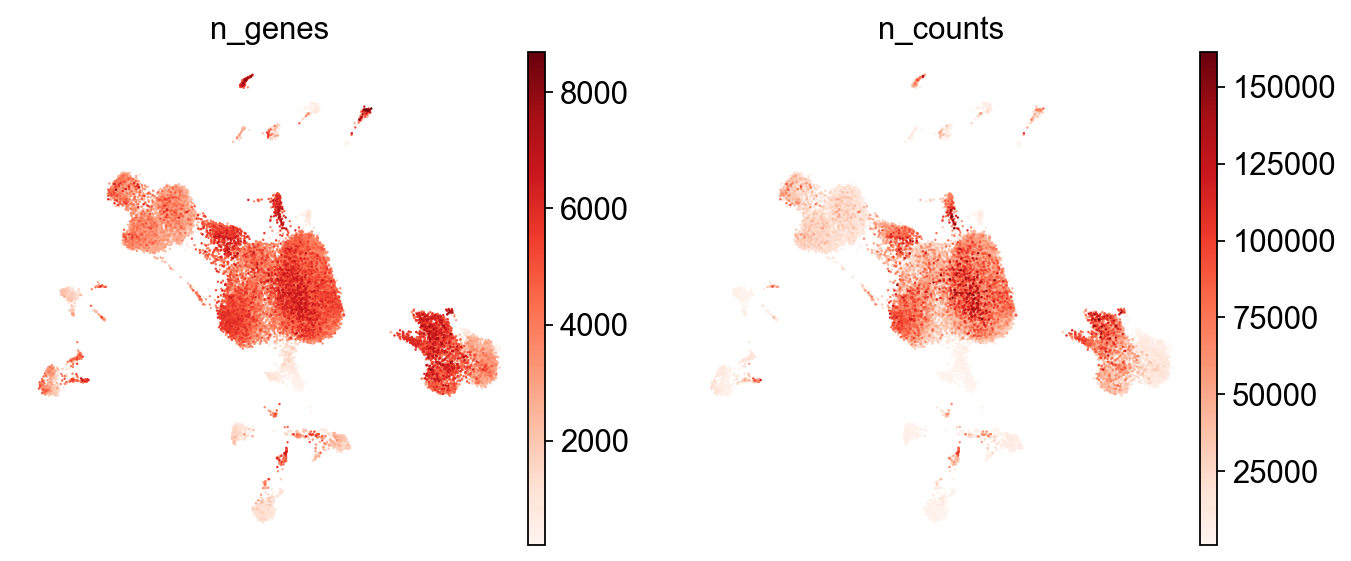

In [19]:
sc.pl.umap(pineros, color=['n_genes', 'n_counts'])

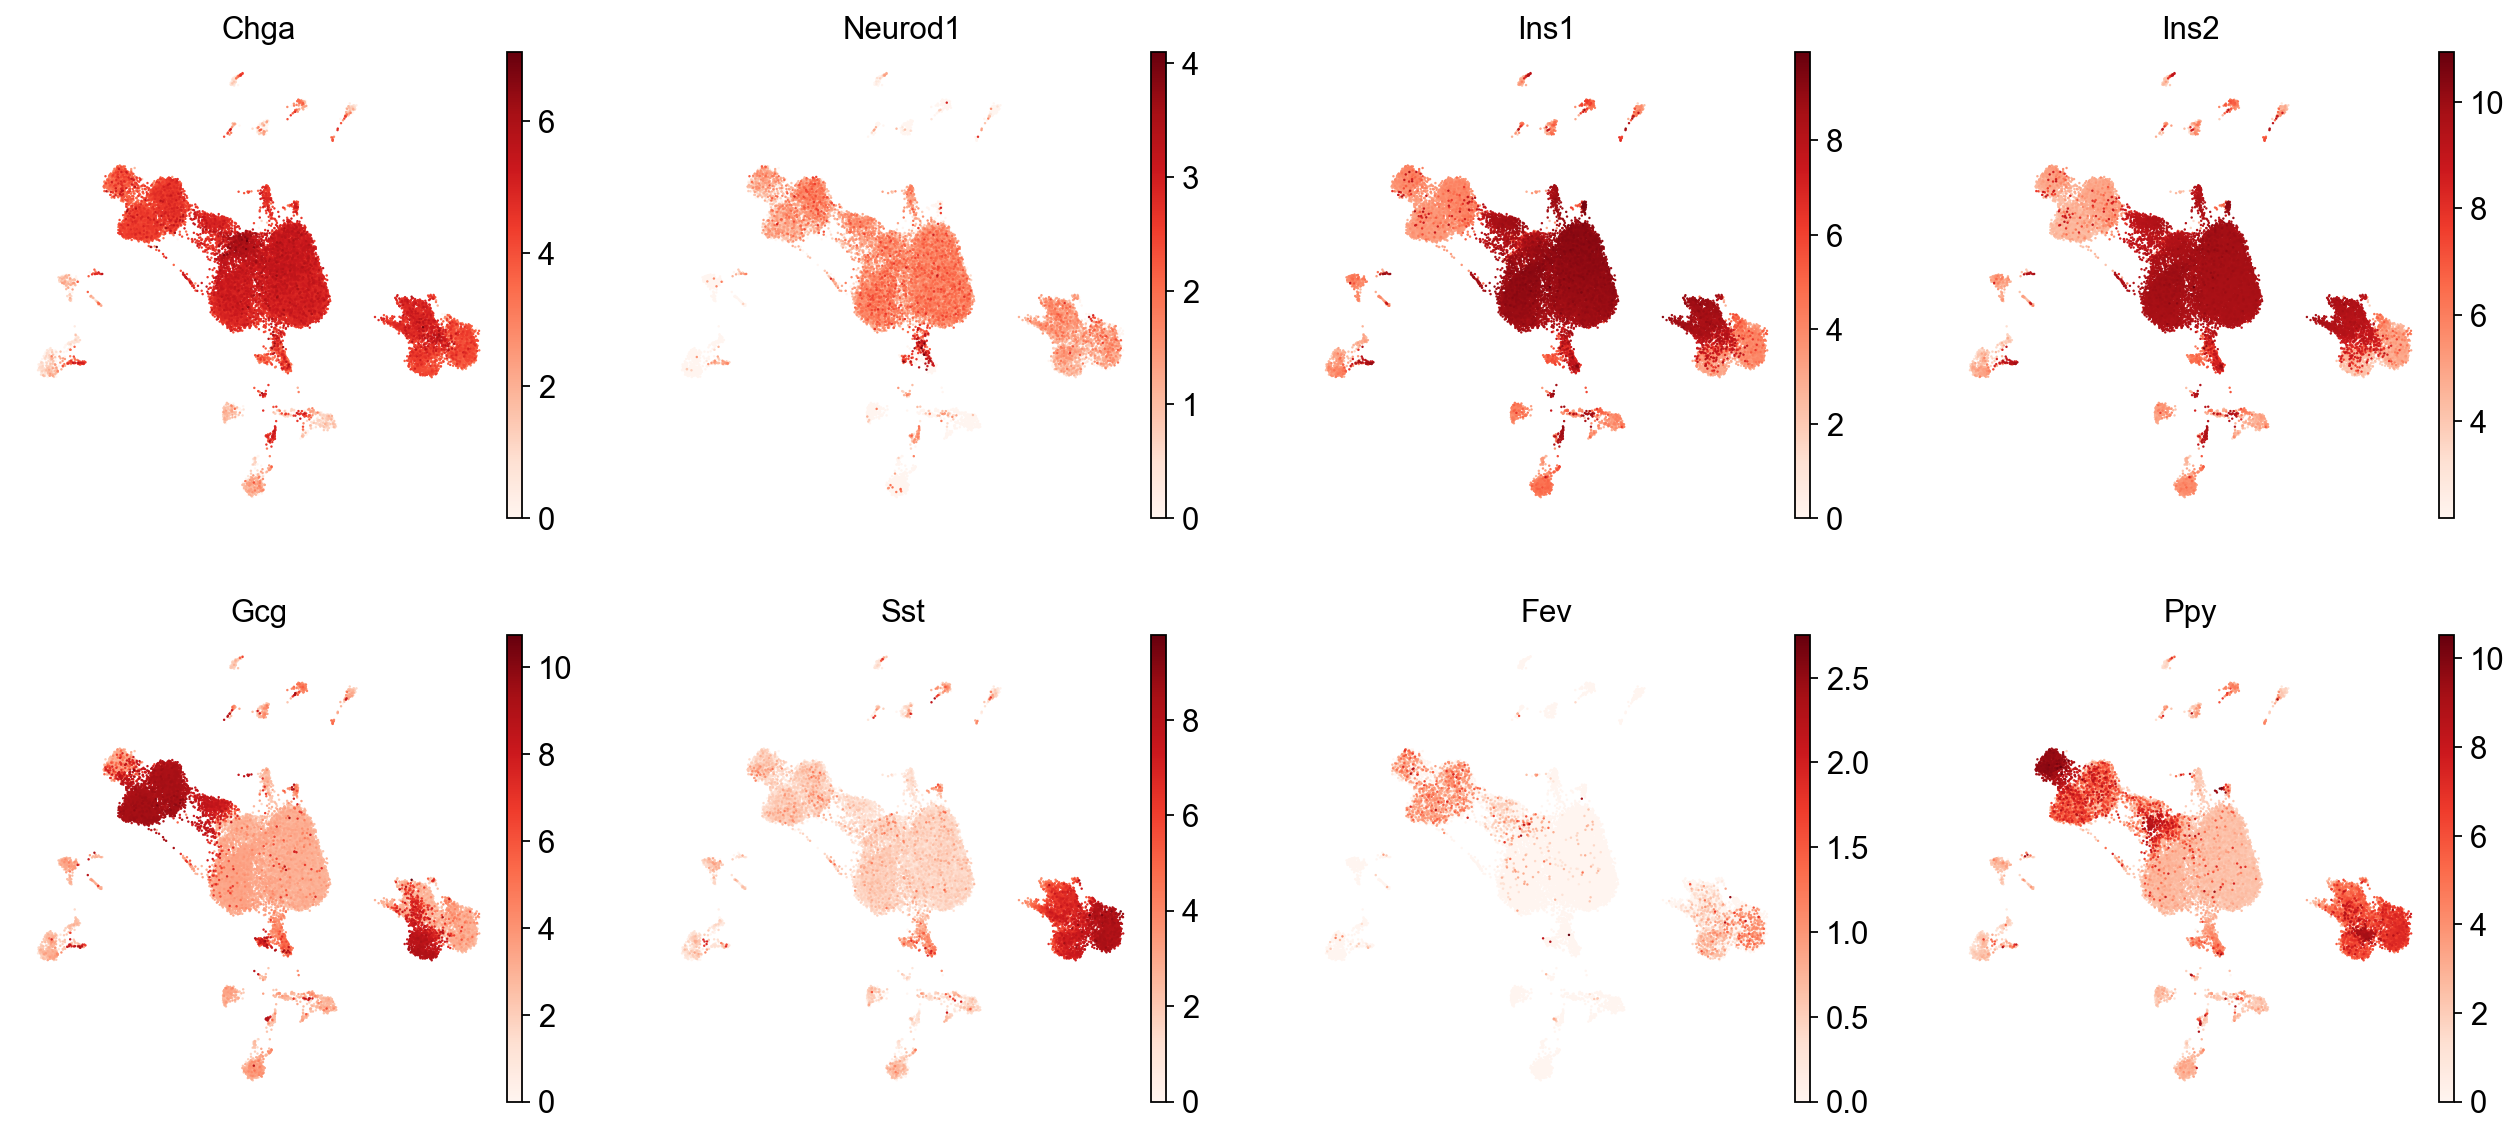

In [20]:
sc.pl.umap(pineros, color=['Chga', 'Neurod1', 'Ins1', 'Ins2', 'Gcg', 'Sst', 'Fev', 'Ppy', ])

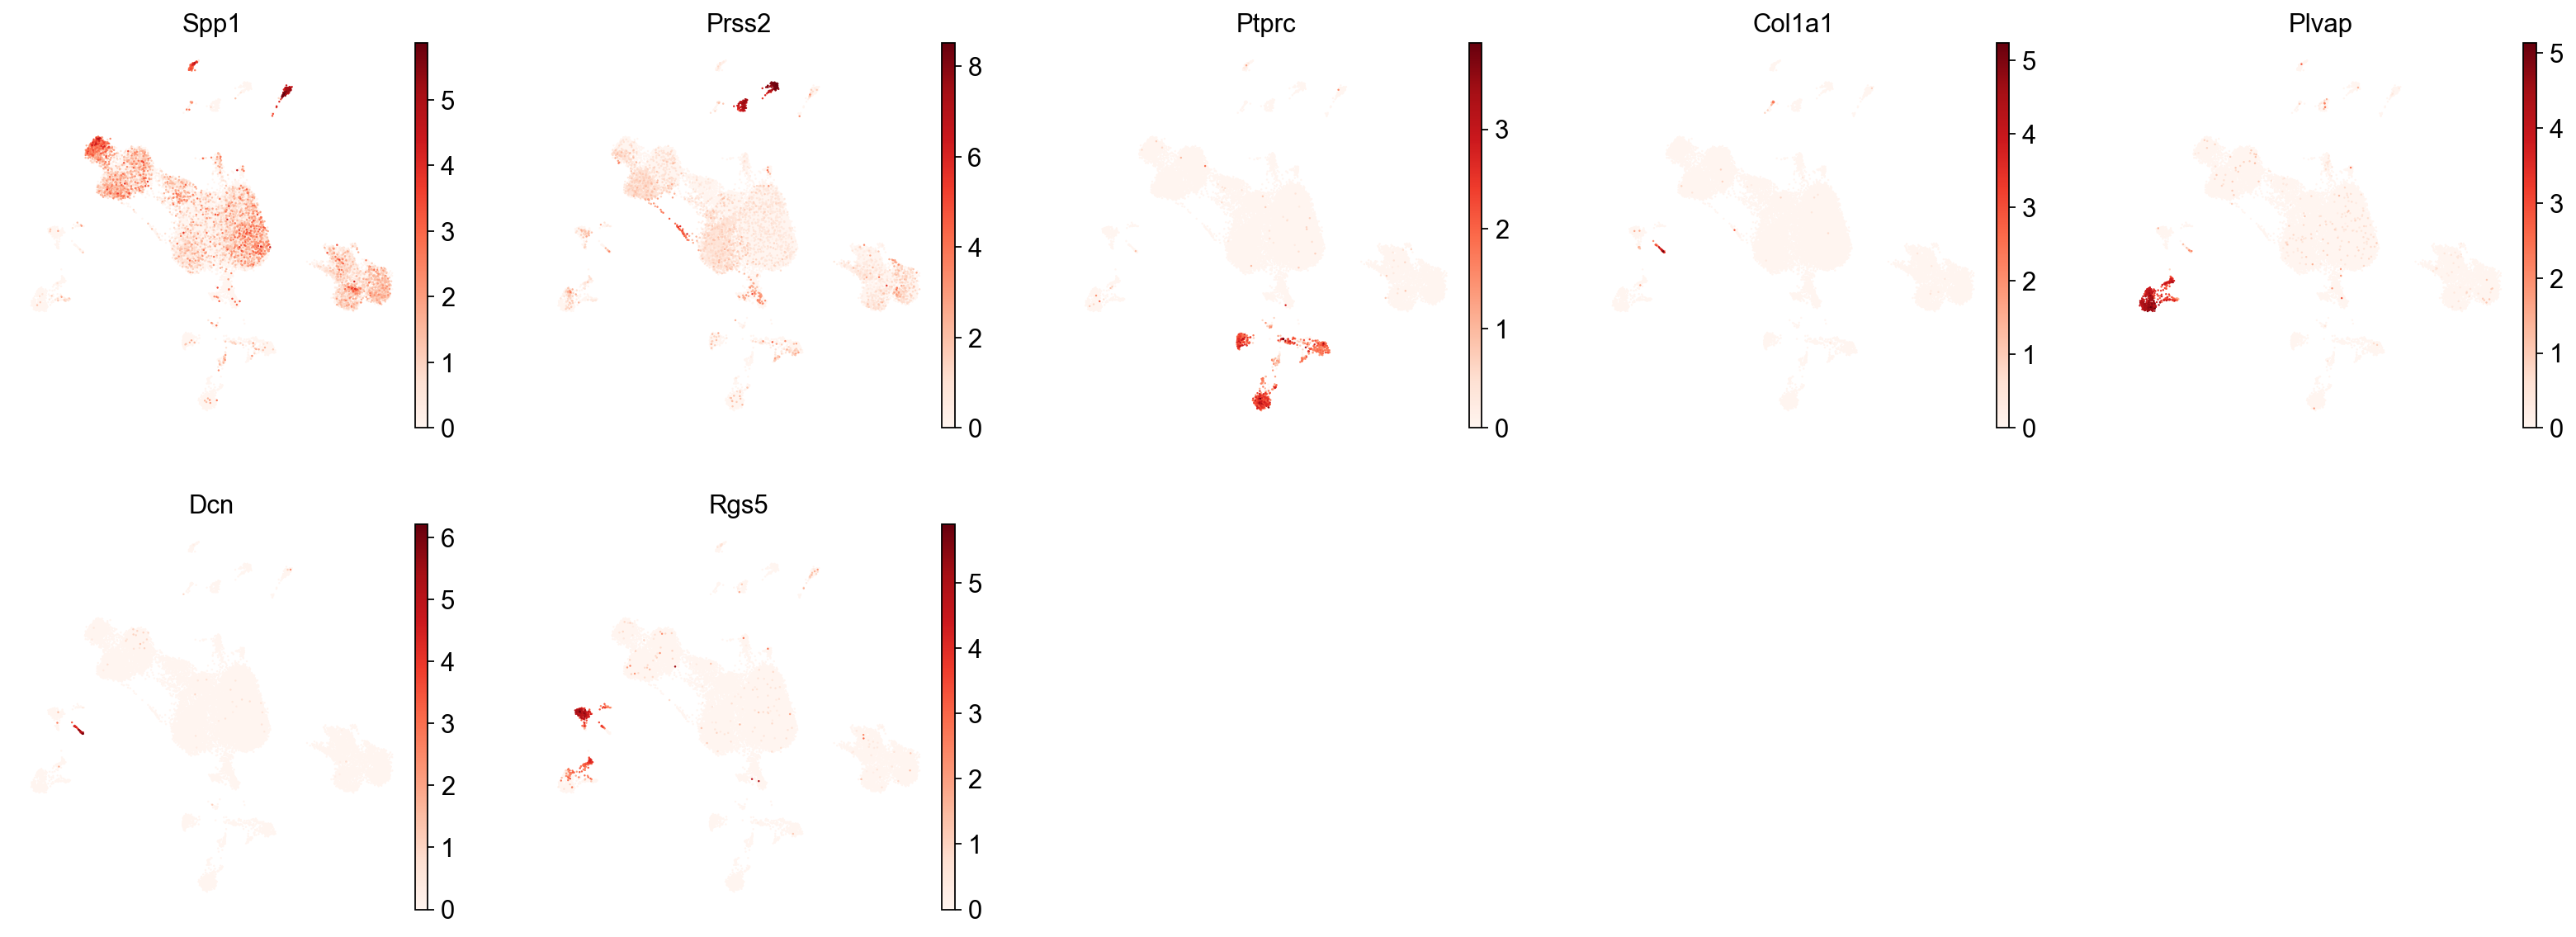

In [21]:
sc.pl.umap(pineros, color=['Spp1', 'Prss2', 'Ptprc', 'Col1a1', 'Plvap', 'Dcn', 'Rgs5'], ncols=5)

In [22]:
sc.tl.louvain(pineros)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 23 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:04)


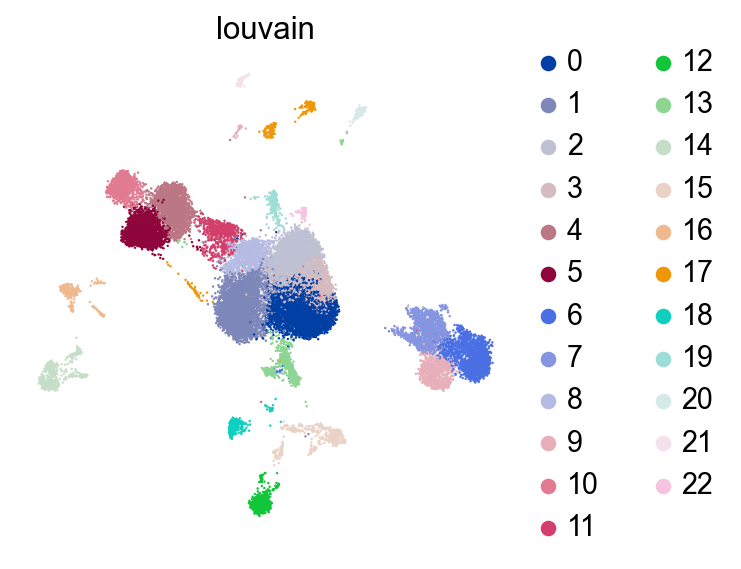

In [23]:
sc.pl.umap(pineros, color=['louvain'])

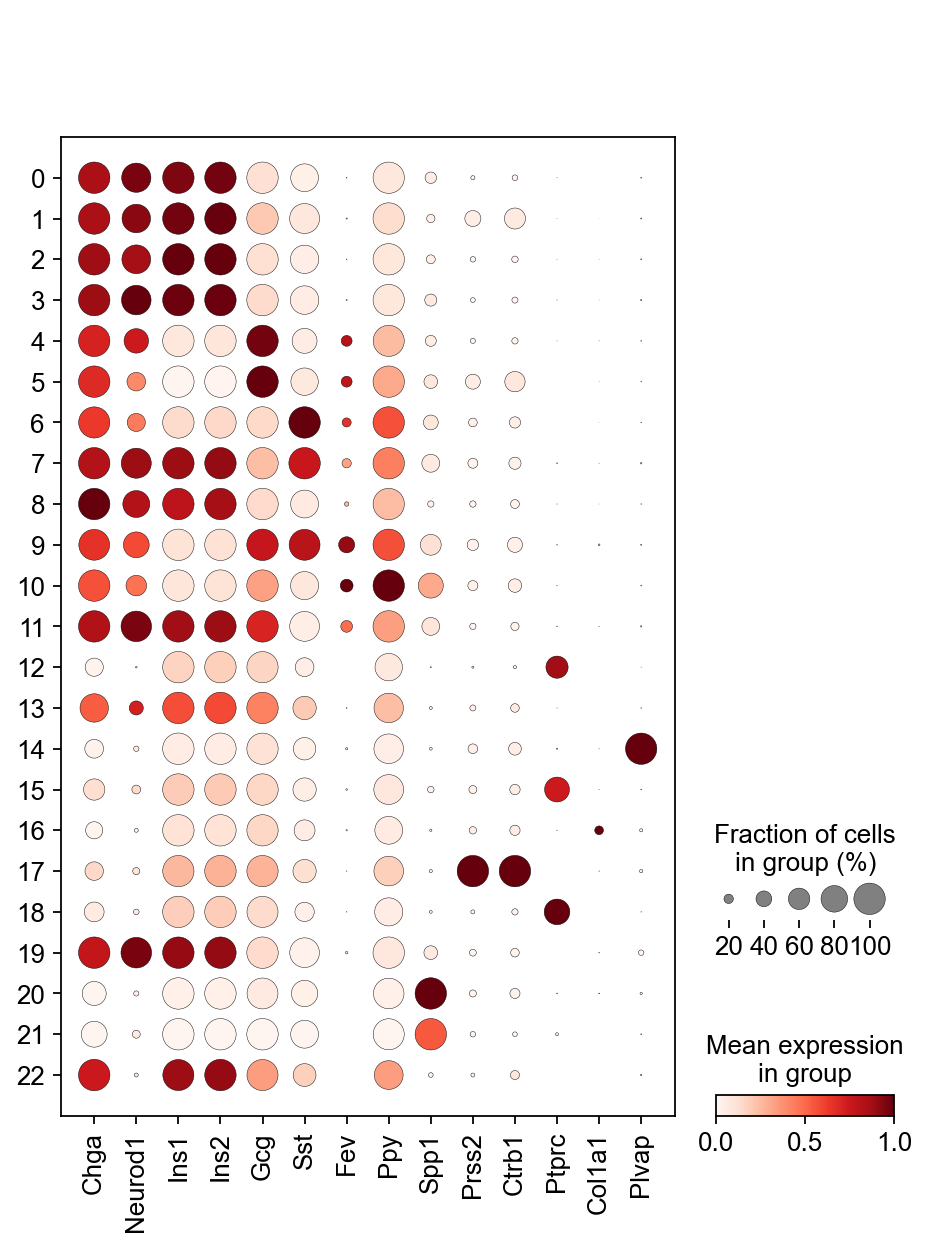

In [24]:
sc.pl.dotplot(pineros, groupby='louvain', var_names=['Chga', 'Neurod1', 'Ins1', 'Ins2', 'Gcg', 'Sst', 'Fev', 'Ppy', 
                                                     'Spp1', 'Prss2', 'Ctrb1', 'Ptprc', 'Col1a1', 'Plvap'], standard_scale='var')

In [121]:
map_names = {}

for c in pineros.obs['louvain'].cat.categories:
    if c in ['0', '1', '2', '3', '8', '19', '22']:
        map_names[c] = 'beta'
    elif c in ['4', '5']:
        map_names[c] = 'alpha'  
    elif c in ['6']:
        map_names[c] = 'delta'
    elif c in ['10']:
        map_names[c] = 'PP'    
    elif c in ['11', '9', '7',  '13']:
        map_names[c] = 'polyhormonal'
    elif c in ['21', '20']:
        map_names[c] = 'ductal' 
    elif c in ['17']:
        map_names[c] = 'acinar' 
    elif c in ['14']:
        map_names[c] = 'endothelial'
    elif c in ['16']:
        map_names[c] = 'stellate'
    elif c in ['12', '15', '18']:
        map_names[c] = 'immune' 
    else:
        map_names[c] = c

pineros.obs['louvain_anno_broad'] = pineros.obs['louvain']
pineros.obs['louvain_anno_broad'] = pineros.obs['louvain_anno_broad'].map(map_names).astype('category')

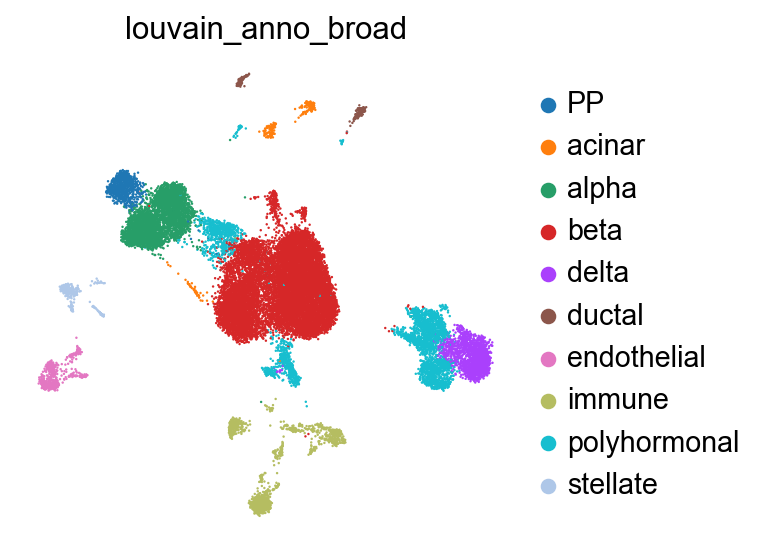

In [122]:
sc.pl.umap(pineros, color=['louvain_anno_broad'])

## Beta cell mapping

### Gene set representation

In [123]:
adata_beta = sc.read('../human_islets_notebooks/data/adata_human_beta.h5ad')

In [124]:
conv = pd.read_csv('../BED_mapping_genes.csv')

In [125]:
conv = conv.loc[[gene in adata_beta.var_names for gene in conv['human_symbol']]]
conv = conv.loc[[gene in pineros.var_names for gene in conv['mouse_symbol']]]

In [126]:
conv.shape

(11319, 9)

In [127]:
adata_beta = adata_beta[:,conv['human_symbol'].tolist()].copy()

In [128]:
adata_beta_pineros = pineros[pineros.obs.louvain_anno_broad.isin(['beta'])].copy()

In [188]:
n_cells = int(adata_beta_pineros.obs.batch.value_counts().median())
n_d = len(adata_beta_pineros.obs.batch.unique())
n_genes = adata_beta_pineros.obs.n_genes.median()
n_cells_tot = adata_beta_pineros.n_obs
print(f'Pineros\nn={n_d}, total cells={n_cells_tot}, median cells={n_cells}, median genes={n_genes}')

Pineros
n=3, total cells=12980, median cells=4203, median genes=3674.5


In [190]:
adata_beta_pineros.obs.batch.value_counts()

0    5727
2    4203
1    3050
Name: batch, dtype: int64

### Subset data to mappable genes and scaling

In [129]:
adata_beta_pineros = adata_beta_pineros[:,conv['mouse_symbol'].tolist()].copy()
adata_beta_pineros.var_names

Index(['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3',
       'mt-Nd3', 'mt-Nd4l', 'mt-Nd4',
       ...
       'Bach1', 'K230010J24Rik', 'Fam53c', 'Gtpbp10', 'Sumf1', 'Bcar3',
       'Smim8', 'Pde10a', 'St7', 'Ahsa2'],
      dtype='object', length=11319)

In [130]:
adata_beta_pineros.var_names = adata_beta.var_names

In [131]:
genes_overlap = list(set(adata_beta.var_names).intersection(adata_beta_pineros.var_names))

In [132]:
len(genes_overlap)

11319

subset gene sets to overlapping genes

In [133]:
mk_human = pd.read_excel('../human_islets_notebooks/data/output_files/gene_sets_beta.xlsx')
mk_human_map = {}
for col in mk_human.columns:
    mk_human_map[col] = [gene for gene in mk_human[col] if gene in genes_overlap]

gene set scoring

In [134]:
sc.settings.verbosity=1
for key in mk_human_map.keys():
    sc.tl.score_genes(adata_beta, gene_list=mk_human_map[key], score_name=f'human_G{key}')
    sc.tl.score_genes(adata_beta_pineros, gene_list=mk_human_map[key], score_name=f'human_G{key}')

gene set representation

In [135]:
# sorted gene sets
obs_g = ['_'.join(['human',a]) for a in ['G7', 'G8', 'G10', 'G11','G3', 'G17', 'G1', 'G2', 'G5', 'G6', 'G4', 'G12', 'G13', 'G14', 'G18', 'G19', 'G9', 'G16']]

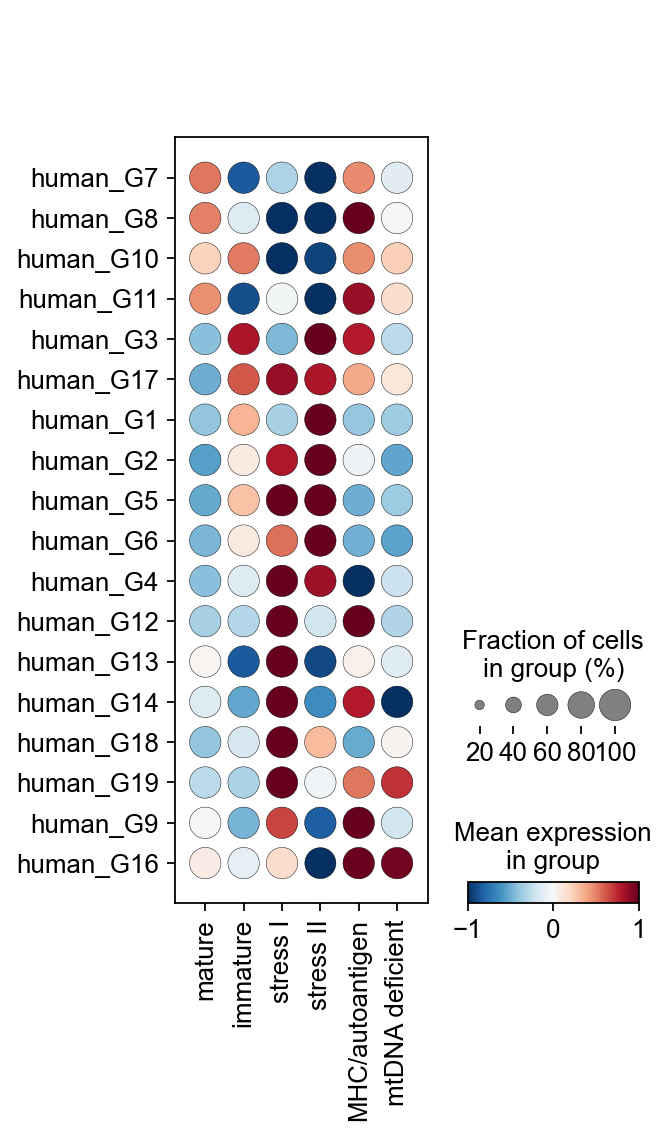

In [136]:
adata_beta_g = sc.AnnData(adata_beta.obs[obs_g])
adata_beta_g.obs = adata_beta.obs
sc.pl.dotplot(sc.pp.scale(adata_beta_g, copy=True), groupby='louvain_anno_fine', 
              var_names=adata_beta_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

In [137]:
adata_beta_pineros_g = sc.AnnData(adata_beta_pineros.obs[obs_g])
adata_beta_pineros_g.obs = adata_beta_pineros.obs

### Mapping in gene set space

In [138]:
adata_beta_g_scaled = sc.pp.scale(adata_beta_g, copy=True)
adata_beta_pineros_g_scaled = sc.pp.scale(adata_beta_pineros_g, copy=True)

In [196]:
adata_beta_g_scaled.uns['louvain_anno_fine_colors']=['#fdb462', '#80b1d3', '#b3de69', '#bebada', '#fb8072', '#8dd3c7']
adata_beta_pineros_g_scaled.uns['louvain_anno_fine_colors'] = ['#fdb462', '#80b1d3', '#b3de69', '#bebada', '#fb8072', '#8dd3c7']

compute reference embedding

In [140]:
sc.pp.pca(adata_beta_g_scaled)
sc.pp.neighbors(adata_beta_g_scaled)
sc.tl.umap(adata_beta_g_scaled)

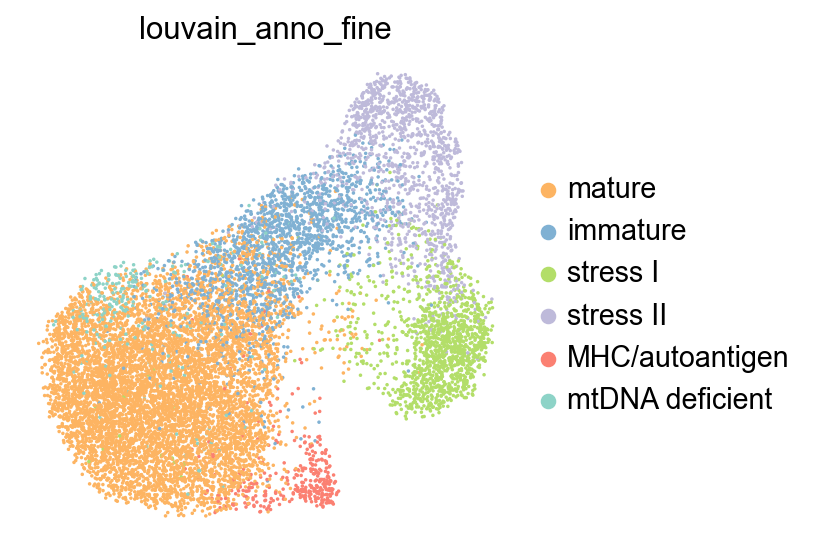

In [141]:
sc.set_figure_params(frameon=False)
sc.pl.umap(adata_beta_g_scaled, color='louvain_anno_fine')

map data to reference

In [142]:
sc.tl.ingest(adata_beta_pineros_g_scaled, adata_beta_g_scaled , obs='louvain_anno_fine', neighbors_key='neighbors')

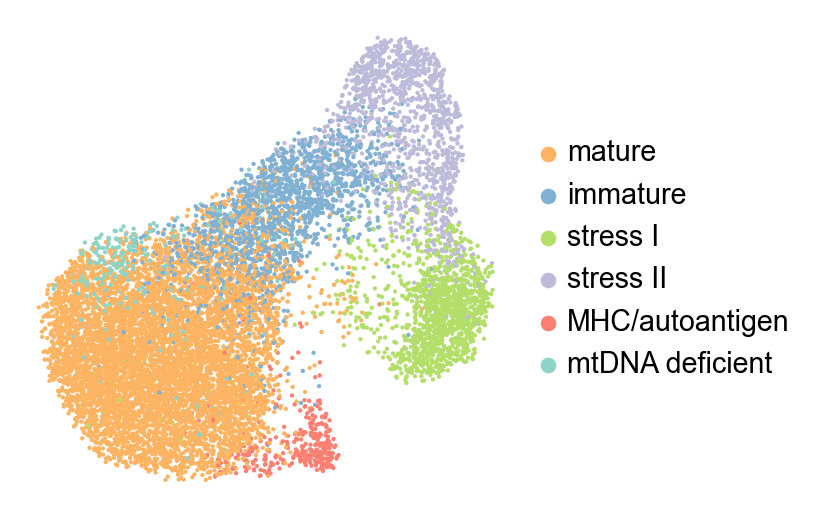

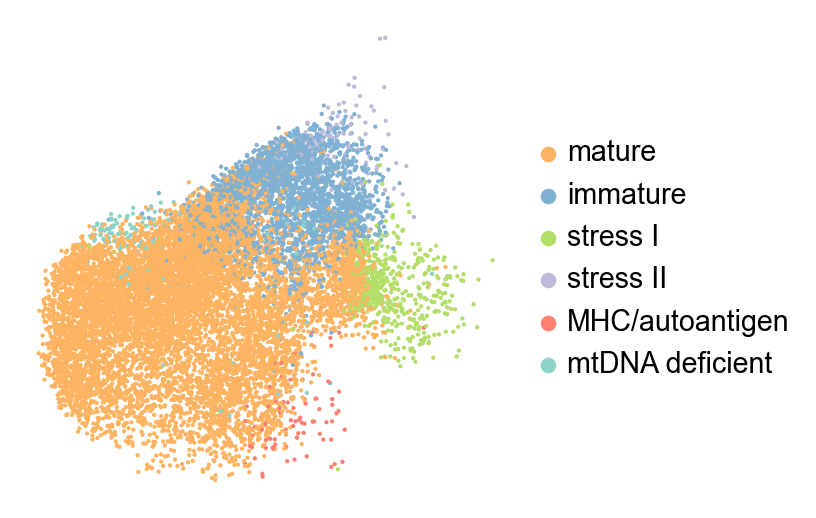

In [197]:
sc.pl.umap(adata_beta_g_scaled, color='louvain_anno_fine', size=15, title='')
sc.pl.umap(adata_beta_pineros_g_scaled, color=['louvain_anno_fine'], size=15, title='')

In [144]:
adata_beta_pineros_g_scaled.obs.louvain_anno_fine.value_counts()

mature             9399
immature           2670
stress I            538
mtDNA deficient     164
stress II           123
MHC/autoantigen      86
Name: louvain_anno_fine, dtype: int64

transfer labels to expression data

In [145]:
adata_beta_pineros = pineros[pineros.obs.louvain_anno_broad.isin(['beta'])].copy()

In [146]:
adata_beta_pineros.obs['louvain_anno_fine'] = adata_beta_pineros_g_scaled.obs['louvain_anno_fine']

### Gene set activation

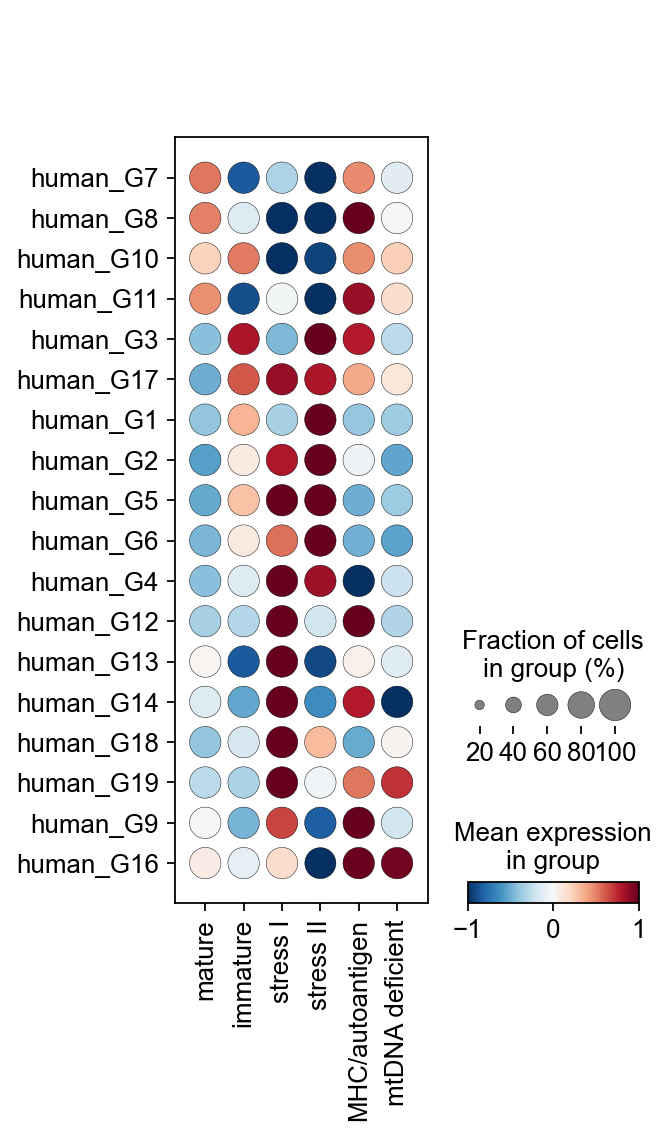

In [147]:
sc.pl.dotplot(adata_beta_g_scaled, groupby='louvain_anno_fine', 
              var_names=adata_beta_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

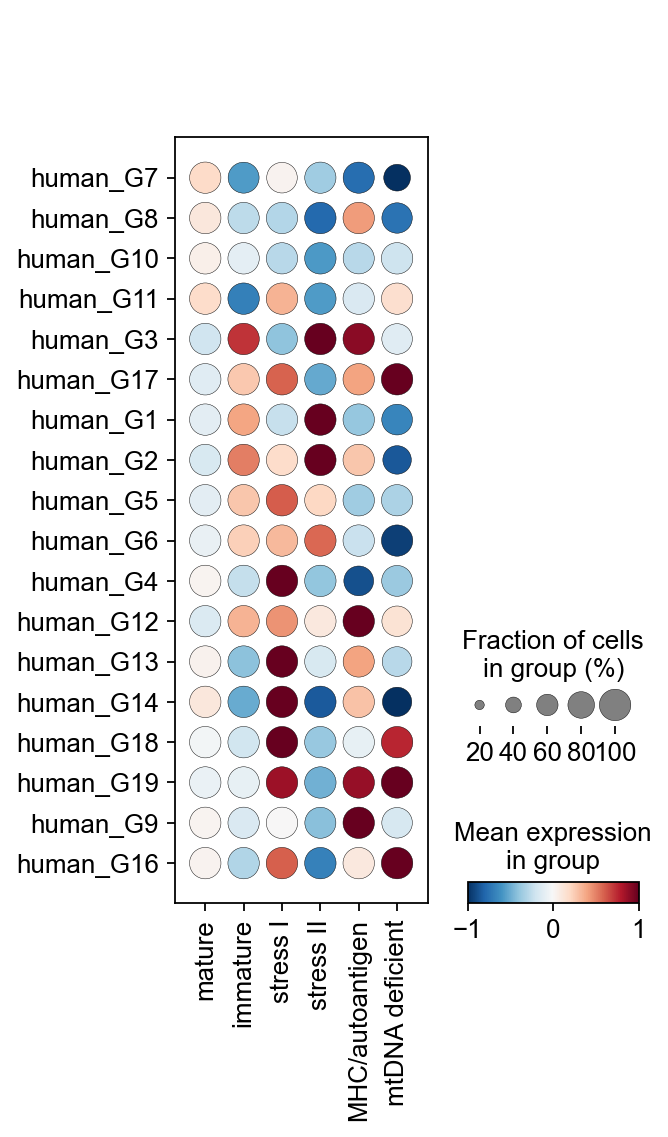

In [148]:
sc.pl.dotplot(adata_beta_pineros_g_scaled, groupby='louvain_anno_fine', 
              var_names=adata_beta_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

### Cell state distribution

In [149]:
import matplotlib.pyplot as pl

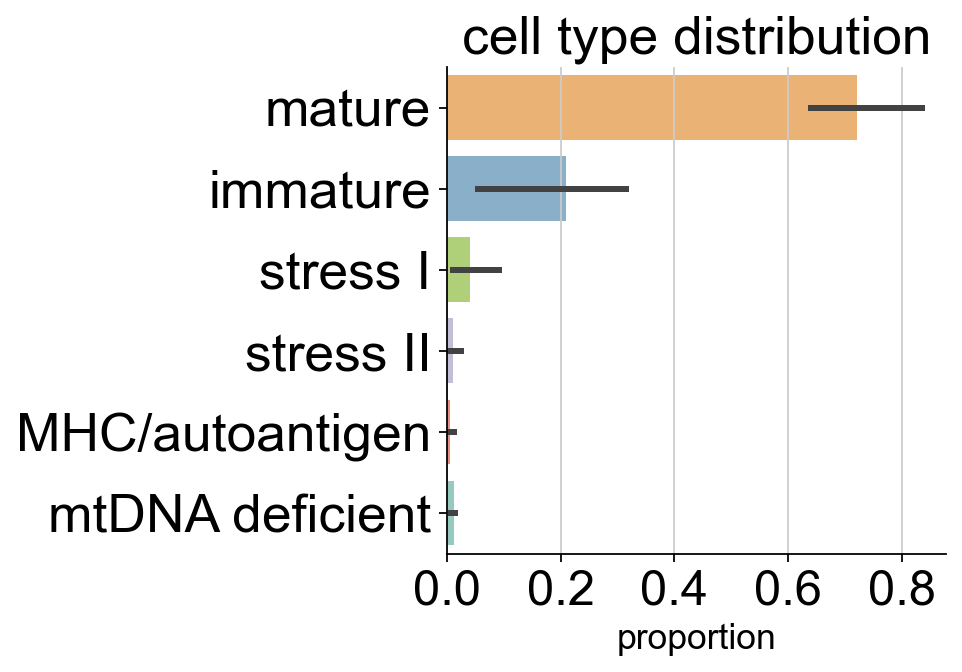

In [150]:
x='louvain_anno_fine'
hue='batch'
y='proportion'

df = pd.crosstab(adata_beta_pineros.obs[x], adata_beta_pineros.obs[hue], normalize=1)

df.index = df.index.tolist()
df.columns = df.columns.tolist()
prop_df = df.reset_index().melt(id_vars=['index'])

sns.barplot(y='index', x='value', data=prop_df, palette=adata_beta.uns['louvain_anno_fine_colors'], orient='h')
pl.xticks(rotation=0,fontsize=22)
pl.yticks(rotation=0,fontsize=24)

pl.title('cell type distribution', fontsize=24)
pl.ylabel('')
pl.xlabel('proportion',fontsize=16)
sns.despine()
pl.show()

In [151]:
adata_beta_pineros.obs.louvain_anno_fine.value_counts(normalize=True)

mature             0.724114
immature           0.205701
stress I           0.041448
mtDNA deficient    0.012635
stress II          0.009476
MHC/autoantigen    0.006626
Name: louvain_anno_fine, dtype: float64

In [152]:
pd.crosstab(adata_beta_pineros.obs.louvain_anno_fine, adata_beta_pineros.obs.batch, normalize=1)

batch                     0         1         2
louvain_anno_fine                              
mature             0.687096  0.639672  0.835832
immature           0.257901  0.314754  0.055437
stress I           0.021826  0.009836  0.091125
stress II          0.007508  0.024590  0.001190
MHC/autoantigen    0.011874  0.003934  0.001428
mtDNA deficient    0.013794  0.007213  0.014989

## Alpha cell mapping

### Gene set representation

In [153]:
adata_alpha = sc.read('../human_islets_notebooks/data/adata_human_alpha.h5ad')

In [154]:
conv = pd.read_csv('../BED_mapping_genes.csv')

In [155]:
conv = conv.loc[[gene in adata_alpha.var_names for gene in conv['human_symbol']]]
conv = conv.loc[[gene in pineros.var_names for gene in conv['mouse_symbol']]]

In [156]:
conv.shape

(11136, 9)

In [157]:
adata_alpha = adata_alpha[:,conv['human_symbol'].tolist()].copy()

In [158]:
adata_alpha_pineros = pineros[pineros.obs.louvain_anno_broad.isin(['alpha'])].copy()

### Subset data to mappable genes and scaling

In [159]:
n_cells = int(adata_alpha_pineros.obs.batch.value_counts().median())
n_d = len(adata_alpha_pineros.obs.batch.unique())
n_genes = adata_alpha_pineros.obs.n_genes.median()
n_cells_tot = adata_alpha_pineros.n_obs
print(f'Pineros\nn={n_d}, total cells={n_cells_tot}, median cells={n_cells}, median genes={n_genes}')

Pineros
n=3, total cells=3851, median cells=1291, median genes=2467.0


In [160]:
adata_alpha_pineros.obs.batch.value_counts()

2    2026
0    1291
1     534
Name: batch, dtype: int64

In [162]:
n_d = len(adata_alpha.obs.donor.unique())
n_genes = adata_alpha.obs.n_genes.median()
n_cells_tot = adata_alpha.n_obs
print(f'Tritschler\nn={n_d}, total cells={n_cells_tot}, median cells={n_cells_tot}, median genes={n_genes}')

Tritschler
n=5, total cells=11541, median cells=11541, median genes=3058.0


In [163]:
adata_alpha_pineros = adata_alpha_pineros[:,conv['mouse_symbol'].tolist()].copy()
adata_alpha_pineros.var_names

Index(['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3',
       'mt-Nd3', 'mt-Nd4l', 'mt-Nd4',
       ...
       'Bach1', 'K230010J24Rik', 'Fam53c', 'Gtpbp10', 'Sumf1', 'Bcar3',
       'Smim8', 'Pde10a', 'St7', 'Ahsa2'],
      dtype='object', length=11136)

In [164]:
adata_alpha_pineros.var_names = adata_alpha.var_names

In [165]:
genes_overlap = list(set(adata_alpha.var_names).intersection(adata_alpha_pineros.var_names))

In [166]:
len(genes_overlap)

11136

subset gene sets to overlapping genes

In [167]:
mk_human = pd.read_excel('../human_islets_notebooks/data/output_files/gene_sets_alpha.xlsx')
mk_human_map = {}
for col in mk_human.columns:
    mk_human_map[col] = [gene for gene in mk_human[col] if gene in genes_overlap]

gene set scoring

In [168]:
sc.settings.verbosity=1
for key in mk_human_map.keys():
    sc.tl.score_genes(adata_alpha, gene_list=mk_human_map[key], score_name=f'human_G{key}')
    sc.tl.score_genes(adata_alpha_pineros, gene_list=mk_human_map[key], score_name=f'human_G{key}')

gene set representation

In [169]:
# sorted gene sets
obs_g = ['_'.join(['human',a]) for a in ['G7', 'G8', 'G12', 'G13', 'G3', 'G4', 'G2', 'G5', 'G1', 'G6', 'G14', 'G10']]

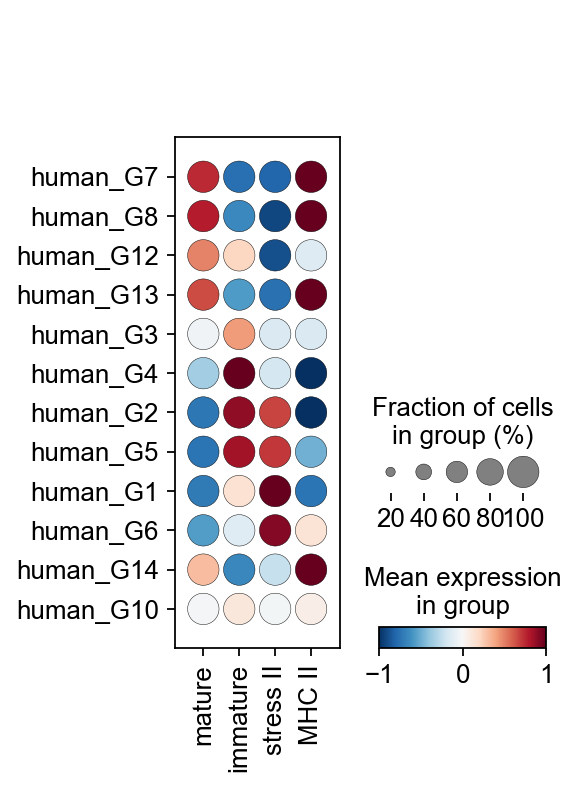

In [170]:
adata_alpha_g = sc.AnnData(adata_alpha.obs[obs_g])
adata_alpha_g.obs = adata_alpha.obs
sc.pl.dotplot(sc.pp.scale(adata_alpha_g, copy=True), groupby='louvain_anno_fine', 
              var_names=adata_alpha_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

In [171]:
adata_alpha_pineros_g = sc.AnnData(adata_alpha_pineros.obs[obs_g])
adata_alpha_pineros_g.obs = adata_alpha_pineros.obs

### Mapping in gene set space

In [172]:
adata_alpha_g_scaled = sc.pp.scale(adata_alpha_g, copy=True)
adata_alpha_pineros_g_scaled = sc.pp.scale(adata_alpha_pineros_g, copy=True)

In [194]:
adata_alpha_g_scaled.uns['louvain_anno_fine_colors']=['#fdb462', '#80b1d3', '#bebada', '#fb8072', '#8dd3c7']
adata_alpha_pineros_g_scaled.uns['louvain_anno_fine_colors'] = ['#fdb462', '#80b1d3', '#bebada', '#fb8072', '#8dd3c7']

compute reference embedding

In [174]:
sc.pp.pca(adata_alpha_g_scaled)
sc.pp.neighbors(adata_alpha_g_scaled)
sc.tl.umap(adata_alpha_g_scaled)

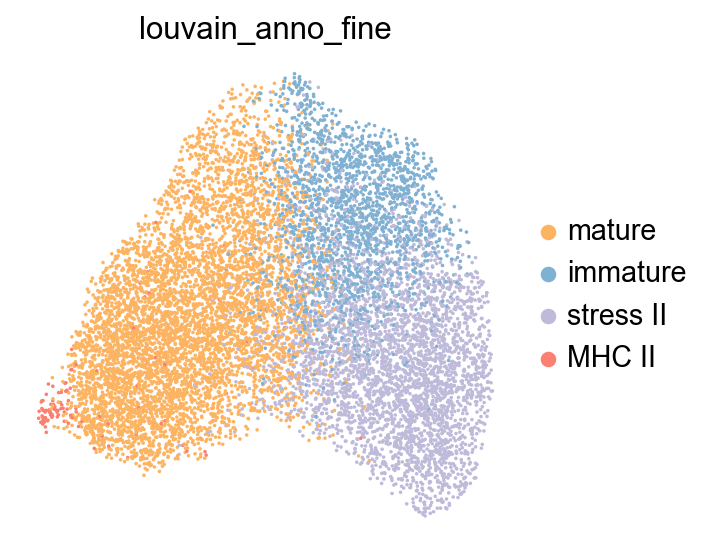

In [192]:
sc.set_figure_params(frameon=False)
sc.pl.umap(adata_alpha_g_scaled, color='louvain_anno_fine')

map data to reference

In [176]:
sc.tl.ingest(adata_alpha_pineros_g_scaled, adata_alpha_g_scaled , obs='louvain_anno_fine', neighbors_key='neighbors')

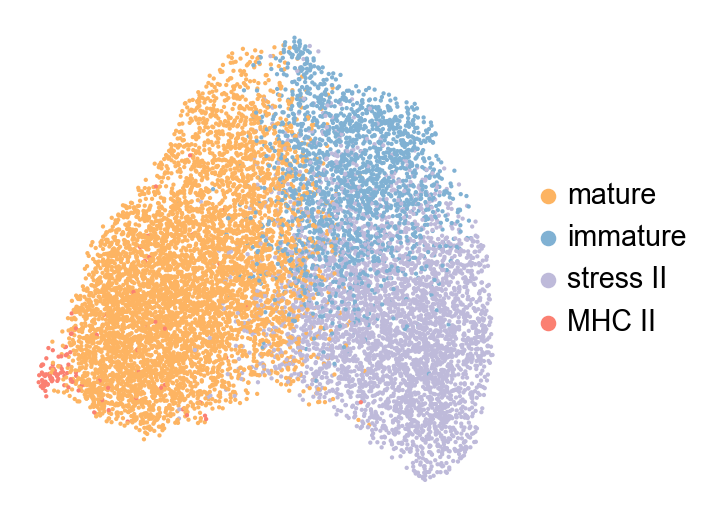

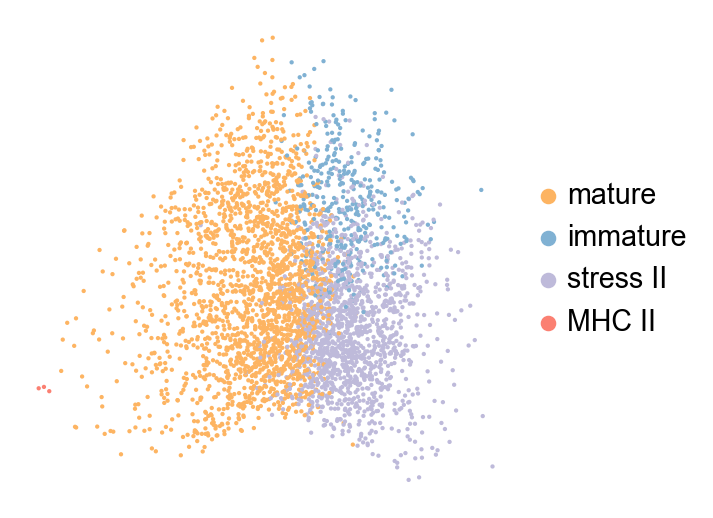

In [195]:
sc.pl.umap(adata_alpha_g_scaled, color='louvain_anno_fine', size=15, title='')
sc.pl.umap(adata_alpha_pineros_g_scaled, color=['louvain_anno_fine'], size=15, title='')

In [178]:
adata_alpha_pineros_g_scaled.obs.louvain_anno_fine.value_counts()

mature       2038
stress II    1432
immature      378
MHC II          3
Name: louvain_anno_fine, dtype: int64

transfer labels to expression data

In [179]:
adata_alpha_pineros = pineros[pineros.obs.louvain_anno_broad.isin(['alpha'])].copy()

In [180]:
adata_alpha_pineros.obs['louvain_anno_fine'] = adata_alpha_pineros_g_scaled.obs['louvain_anno_fine']

### Gene set activation

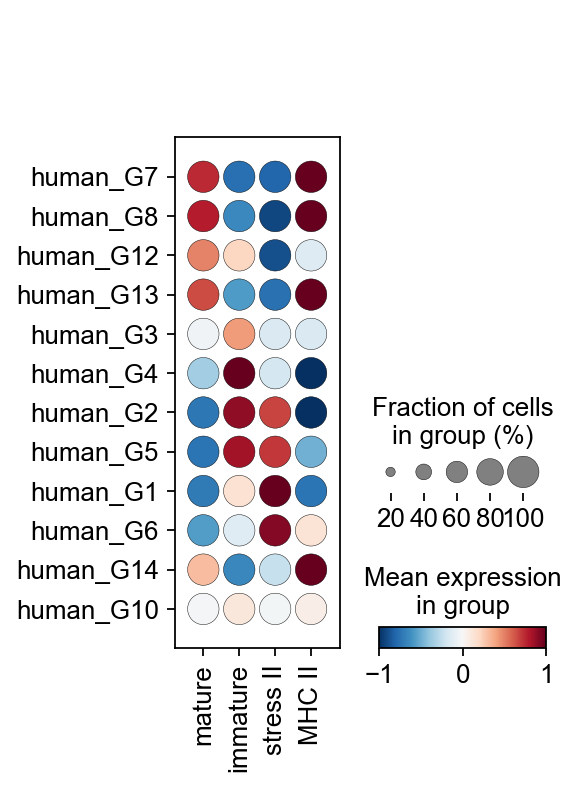

In [181]:
sc.pl.dotplot(adata_alpha_g_scaled, groupby='louvain_anno_fine', 
              var_names=adata_alpha_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

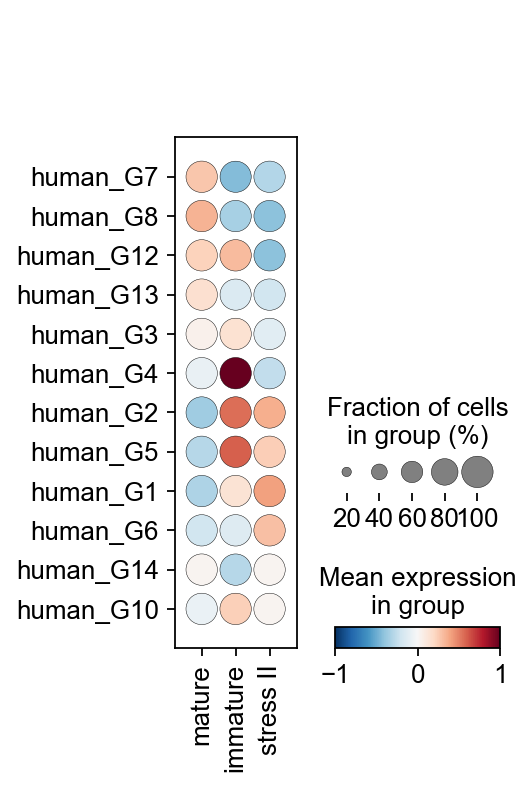

In [198]:
sc.pl.dotplot(adata_alpha_pineros_g_scaled[~adata_alpha_pineros_g_scaled.obs.louvain_anno_fine.isin(['MHC II'])].copy(), groupby='louvain_anno_fine', 
              var_names=adata_alpha_g.var_names, swap_axes=True,  
              expression_cutoff=-3, vmax=1, vmin=-1, cmap='RdBu_r')

### Cell state distribution

In [183]:
import matplotlib.pyplot as pl

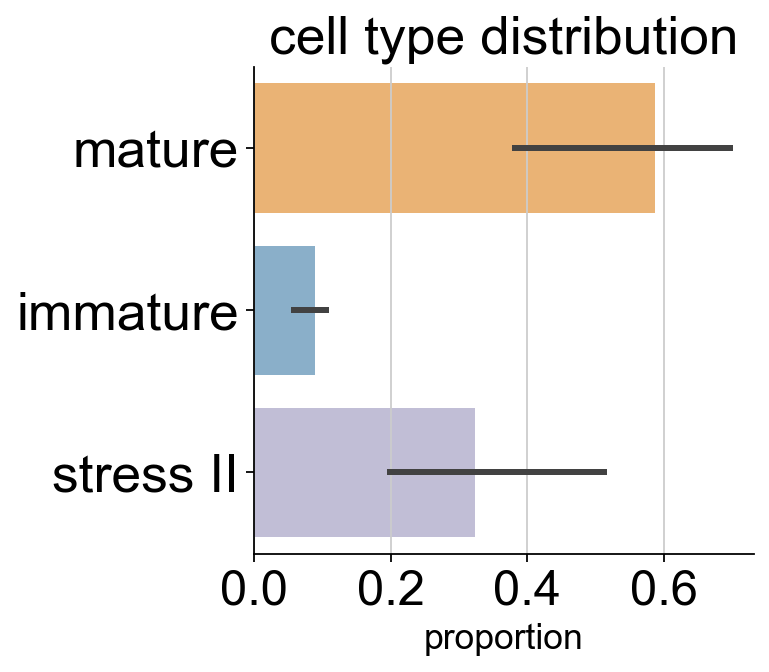

In [199]:
x='louvain_anno_fine'
hue='batch'
y='proportion'

df = pd.crosstab(adata_alpha_pineros[~adata_alpha_pineros_g_scaled.obs.louvain_anno_fine.isin(['MHC II'])].copy().obs[x], adata_alpha_pineros[~adata_alpha_pineros_g_scaled.obs.louvain_anno_fine.isin(['MHC II'])].copy().obs[hue], normalize=1)

df.index = df.index.tolist()
df.columns = df.columns.tolist()
prop_df = df.reset_index().melt(id_vars=['index'])

sns.barplot(y='index', x='value', data=prop_df, palette=adata_alpha.uns['louvain_anno_fine_colors'], orient='h')
pl.xticks(rotation=0,fontsize=22)
pl.yticks(rotation=0,fontsize=24)

pl.title('cell type distribution', fontsize=24)
pl.ylabel('')
pl.xlabel('proportion',fontsize=16)
sns.despine()
pl.show()

In [186]:
adata_alpha_pineros.obs.louvain_anno_fine.value_counts(normalize=True)

mature       0.529213
stress II    0.371851
immature     0.098156
MHC II       0.000779
Name: louvain_anno_fine, dtype: float64

In [187]:
pd.crosstab(adata_alpha_pineros.obs.louvain_anno_fine, adata_alpha_pineros.obs.batch, normalize=1)

batch                     0         1         2
louvain_anno_fine                              
mature             0.696359  0.683521  0.382034
immature           0.104570  0.058052  0.104640
stress II          0.198296  0.256554  0.512833
MHC II             0.000775  0.001873  0.000494